## Malaria Detection Notebook: Model creation

### 1. Introduction

Malaria is a mosquito-borne infectious disease that affects humans and other animals. Malaria causes symptoms that typically include fever, tiredness, vomiting, and headaches. In severe cases, it can cause yellow skin, seizures, coma, or death.[1]  

Malaria occurs mostly in poor tropical and subtropical areas of the world. In many of the countries affected by malaria, it is a leading cause of illness and death. The costs of malaria – to individuals, families, communities, nations – are enormous. In 2019, an estimated 409,000 people died of malaria—most were young children in sub-Saharan Africa.[2]  

#### 1.1 How malaria is diagnosed?
If the doctor thinks you may have malaria, he or she will use a blood smear to check for the disease. During this test, a sample of blood is placed on a glass slide, prepared, and looked at under a microscope.

A blood smear test can help diagnose malaria. It can also help a doctor see what type of malaria parasite you have and how many parasites are in your blood. This can help with decisions about treatment.[3]  

![Infected blood cells](Malaria_Image.jpg)
**Image 1.** Infected blood cells. Credits: LSU HCSD - W.O. Moss Regional Medical Center

Malaria parasites are usually counted against white blood cells using a thick blood smear under a microscope. The person reading the slide should use two tally counters, one for malaria and one for the white blood cells.[4] The procedure requires counting at least 5000 cells.[5]

![Using thin film](http://helid.digicollection.org/documents/who02e/p20b.jpg)
**Image 2.** Blood fil to count parasitized cells. Credits: Basic Malaria Microscopy (part I and II), 1991

### 2. Challenge: How to improve manually cell counting?

Manually counting cells can be a slow process, so in this notebook we will try to create a machine learning model to detect malaria parasitized cells on blood cell images. For this task, we have 13,780 images of parasitized cells, and 13,780 images of uninfected cells. Our goal is to create a classification model for detecting malaria.

In [1]:
# Step 0. Load libraries and IPython configurations
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 1. Load images
dataset = tc.image_analysis.load_images('Cell_Images', with_path = True)


Read 5849 images in 5.00056 secs	speed: 1169.67 file/sec

Read 12110 images in 10.0007 secs	speed: 1252.16 file/sec

Read 18337 images in 15.0012 secs	speed: 1245.29 file/sec

Read 25125 images in 20.0016 secs	speed: 1357.49 file/sec

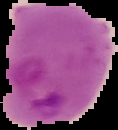

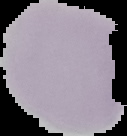

In [3]:
# Step 2. Give a glimpse of the data
image_sarray = dataset['image']
# Let's see an infected cell
image_sarray[10000].show()
# Now let's see an uninfected cell
image_sarray[20000].show()

In [4]:
# Images must be resized
resized_images = tc.image_analysis.resize(image_sarray,224,224)
dataset['image'] = resized_images

In [5]:
# Sice data is not annotated, we will use the name of the folder that contains the images
dataset['label'] = dataset['path'].apply(lambda path: 'malaria' if '/Parasitized' in path else 'not malaria')

In [6]:
# We require a train, validation and test set. 
train2_data, test_data = dataset.random_split(0.8)
train_data, validate_data = train2_data.random_split(0.8)

In [7]:
# The model will use Squeezenet_v1.1, a deep neural network for Computer Vision
model = tc.image_classifier.create(train_data, target = 'label', max_iterations = 100, 
                                   validation_set = validate_data, model = 'squeezenet_v1.1')

Downloading base mlmodel

Downloading https://docs-assets.developer.apple.com/coreml/models/SqueezeNet.mlmodel to /var/folders/3s/fbxlt7n936n42xxcgdmp7h9m0000gn/T/model_cache/squeezenet_v1.1.mlmodel

Using GPU (Intel(R) Iris(TM) Pro Graphics 6200) to extract features.

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 589.596ms    | 0.25%            |

| 128              | 1.01s        | 0.5%             |

| 192              | 1.43s        | 1%               |

| 256              | 1.85s        | 1.25%            |

| 320              | 2.27s        | 1.75%            |

| 640              | 4.38s        | 3.5%             |

| 1280             | 8.58s        | 7%               |

| 1920             | 12.79s       | 10.75%           |

| 2560             | 17.02s       | 14.25%           |

| 3200             | 21.22s       | 17.75%           |

| 3840             | 25.43s       | 21.5%            |

| 4480             | 29.64s       | 25%              |

| 5120             | 33.85s       | 28.75%           |

| 5760             | 38.06s       | 32.25%           |

| 6400             | 42.26s       | 35.75%           |

| 7040             | 46.46s       | 39.5%            |

| 7680             | 50.66s       | 43%              |

| 8320             | 54.87s       | 46.75%           |

| 8960             | 59.07s       | 50.25%           |

| 9600             | 1m 3s        | 53.75%           |

| 10240            | 1m 7s        | 57.5%            |

| 10880            | 1m 11s       | 61%              |

| 11520            | 1m 15s       | 64.5%            |

| 12160            | 1m 20s       | 68.25%           |

| 12800            | 1m 24s       | 71.75%           |

| 13440            | 1m 28s       | 75.5%            |

| 14080            | 1m 32s       | 79%              |

| 14720            | 1m 36s       | 82.5%            |

| 15360            | 1m 41s       | 86.25%           |

| 16000            | 1m 45s       | 89.75%           |

| 16640            | 1m 49s       | 93.5%            |

| 17280            | 1m 53s       | 97%              |

| 17770            | 1m 56s       | 100%             |

+------------------+--------------+------------------+

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 656.502ms    | 1.25%            |

| 128              | 1.07s        | 2.75%            |

| 192              | 1.49s        | 4.25%            |

| 256              | 1.92s        | 5.75%            |

| 320              | 2.34s        | 7%               |

| 640              | 4.45s        | 14.25%           |

| 1280             | 8.65s        | 28.75%           |

| 1920             | 12.86s       | 43.25%           |

| 2560             | 17.09s       | 57.75%           |

| 3200             | 21.30s       | 72.25%           |

| 3840             | 25.51s       | 86.75%           |

| 4387             | 29.11s       | 100%             |

+------------------+--------------+------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 17770

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 1001

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.008669  | 0.897322     | 0.498818          | 0.507636            |

| 1         | 10       | 0.736841  | 2.072428     | 0.498818          | 0.507636            |

| 2         | 12       | 0.736841  | 2.715946     | 0.498818          | 0.507636            |

| 3         | 13       | 0.921051  | 3.173222     | 0.779516          | 0.769546            |

| 4         | 14       | 1.000000  | 3.610932     | 0.629263          | 0.617506            |

| 9         | 23       | 1.000000  | 6.579949     | 0.883343          | 0.875313            |

| 14        | 30       | 1.000000  | 9.215551     | 0.909792          | 0.900388            |

| 19        | 43       | 0.807482  | 13.046760    | 0.922622          | 0.919763            |

| 24        | 48       | 1.000000  | 15.379925    | 0.936241          | 0.932984            |

| 29        | 59       | 0.399112  | 18.698628    | 0.937817          | 0.937087            |

| 34        | 70       | 1.498914  | 22.060274    | 0.940855          | 0.935491            |

| 39        | 84       | 0.006918  | 25.889801    | 0.940855          | 0.937771            |

| 44        | 94       | 1.418738  | 29.098985    | 0.940630          | 0.938455            |

| 49        | 109      | 0.688657  | 33.100463    | 0.942881          | 0.940734            |

| 54        | 121      | 1.012212  | 36.541429    | 0.942150          | 0.940734            |

| 59        | 131      | 0.102363  | 39.708459    | 0.943050          | 0.940506            |

| 64        | 139      | 0.999642  | 42.552973    | 0.943782          | 0.940734            |

| 69        | 148      | 0.200567  | 45.641439    | 0.943557          | 0.942558            |

| 74        | 154      | 0.335036  | 48.150378    | 0.943669          | 0.942330            |

| 79        | 167      | 0.812910  | 51.817986    | 0.944851          | 0.943697            |

| 84        | 172      | 1.000000  | 54.136430    | 0.945189          | 0.943925            |

| 89        | 182      | 1.113372  | 57.275990    | 0.947440          | 0.944609            |

| 94        | 195      | 1.947250  | 61.400310    | 0.946764          | 0.945521            |

| 99        | 207      | 1.423093  | 65.593410    | 0.947214          | 0.945521            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [15]:
# Our model has a summary where we can see the training loss and training time
model.summary()

Class                                    : ImageClassifier

Schema
------
Number of classes                        : 2
Number of feature columns                : 1
Input image shape                        : (3, 227, 227)

Training summary
----------------
Number of examples                       : 17770
Training loss                            : 2672.6593
Training time (sec)                      : 223.5528



In [8]:
# Now we will predict the class on the test data
predictions = model.predict(test_data)
metrics = model.evaluate(test_data)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 658.81ms     | 1%               |

| 128              | 1.07s        | 2.25%            |

| 192              | 1.49s        | 3.5%             |

| 256              | 1.91s        | 4.5%             |

| 320              | 2.34s        | 5.75%            |

| 640              | 4.43s        | 11.75%           |

| 1280             | 8.62s        | 23.5%            |

| 1920             | 12.82s       | 35.25%           |

| 2560             | 17.01s       | 47%              |

| 3200             | 21.21s       | 58.75%           |

| 3840             | 25.41s       | 70.5%            |

| 4480             | 29.61s       | 82.25%           |

| 5120             | 33.81s       | 94%              |

| 5401             | 35.67s       | 100%             |

+------------------+--------------+------------------+

In [9]:
# We can calculate the accuracy of this model
metrics['accuracy']

0.9494538048509535

In [10]:
# Let's print the confusion matrix
metrics['confusion_matrix']

target_label,predicted_label,count
malaria,not malaria,170
malaria,malaria,2518
not malaria,not malaria,2610
not malaria,malaria,103


In [12]:
# On the metrics variable we can see the values of accuracy, precision and recall. 
metrics

{'accuracy': 0.9494538048509535,
 'f1_score': 0.9503003823047516,
 'log_loss': 0.15341933674092592,
 'precision': 0.9388489208633094,
 'recall': 0.9620346479911537,
 'auc': 0.984471468392926,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+---------------------+--------------------+------+------+
 | threshold |         fpr         |        tpr         |  p   |  n   |
 +-----------+---------------------+--------------------+------+------+
 |    0.0    |         1.0         |        1.0         | 2713 | 2688 |
 |   0.001   |  0.5457589285714286 | 0.9981570217471434 | 2713 | 2688 |
 |   0.002   | 0.47767857142857145 | 0.9974198304460007 | 2713 | 2688 |
 |   0.003   | 0.43638392857142855 | 0.9955768521931441 | 2713 | 2688 |
 |   0.004   | 0.40587797619047616 | 0.9948396608920015 | 2713 | 2688 |
 |   0.005   | 0.38504464285714285 | 0.9948396608920015 | 2713 | 2688 |
 |   0.006   | 0.36830357142857145 | 0.9944710652414301 

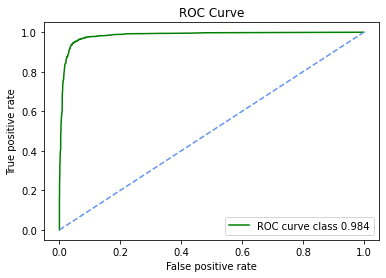

In [13]:
# To plot the ROC curve, we will use pyplot and the values from our metrics
plt.plot(metrics['roc_curve']['fpr'],
        metrics['roc_curve']['tpr'],
        color = 'green',
        label = f"ROC curve class {metrics['auc']:.3f}")
plt.plot([0,1],[0,1], 
         linestyle = '--',
         color = 'cornflowerblue')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'lower right')
plt.show()

### 3. Conclusion

Our model has been trained on the dataset and achieves an accuracy of 94.95%, and an AUC of 98.44%. 

In [16]:
# Save the models for further use
# But first let's ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
model.save('malaria_squeezenet.model')
model.export_coreml('malaria_squeezenet.mlmodel')

### 4. References
[1] Wikipedia. (2021, May 1). *Malaria*, Retrieved from https://en.wikipedia.org/wiki/Malaria  
[2] CDC Centers for Disease Control and Prevenction. (2021, May 2). *Malaria's Impact Worldwide.*, Retrieved from https://www.cdc.gov/malaria/malaria_worldwide/impact.html  
[3] Standford Health Care. (2021, May 1). *Malaria Diagnosis*, Retrieved from https://stanfordhealthcare.org/medical-conditions/primary-care/malaria/diagnosis.html  
[4] Malaria. (2021, May 1). *Parasite counting formula*, Retrieved from http://www.malaria.com/questions/parasite-counting-formula  
[5] Plos One (2021, May 1). *Assumed White Blood Cell Count of 8,000 Cells/μL Overestimates Malaria Parasite Density in the Brazilian Amazon*, Retrieved from https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0094193